In [4]:
from imblearn.under_sampling import TomekLinks, ClusterCentroids
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
import imblearn
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
wine = pd.read_csv('wine.csv')

In [6]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [7]:
wine = wine.drop(['color'], axis = 1)

In [8]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

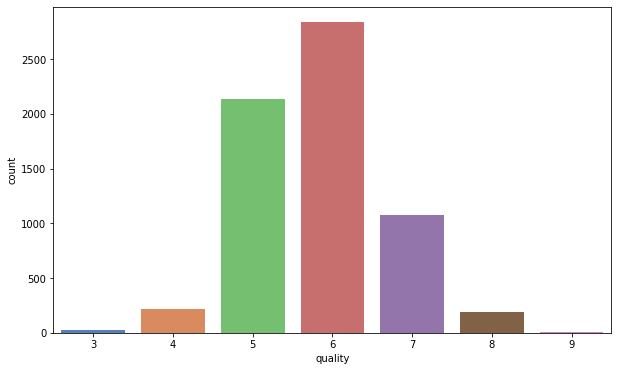

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["quality"], palette="muted")
wine["quality"].value_counts()

In [10]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

In [11]:
[(i, category.count(i)) for i in set(category)]

[('Low', 246), ('Medium', 4974), ('High', 1277)]

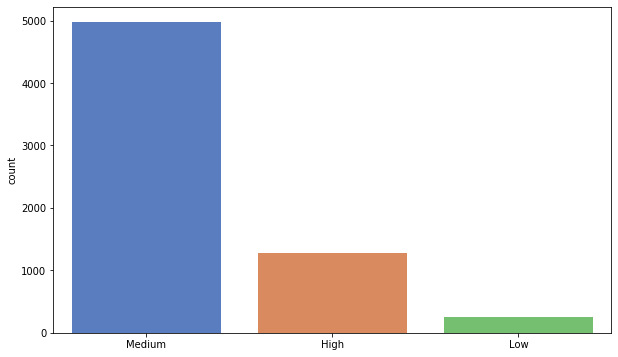

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

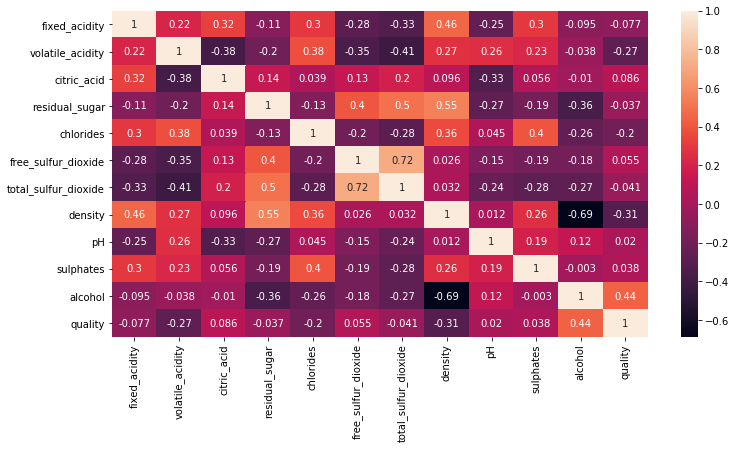

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(wine.corr(), annot=True)

In [14]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Midium")
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([wine, category], axis=1)
data.drop(columns="quality", axis=1, inplace=True)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [15]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)

In [17]:
clf = RandomForestClassifier(random_state=2018, oob_score=True)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],'min_samples_leaf': [1, 2, 4]}
rfc_gs = GridSearchCV(clf, param_grid=param_dist, scoring='accuracy', cv=5)
rfc_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=2018),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy')

In [18]:
rfc_gs.best_score_


0.8464522099652031

In [20]:
clf = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))])

criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11, 15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None]

param_grid =\
    [{'clf__class_weight': class_weight,
      'clf__criterion': criterion,
      'clf__splitter': splitter,
      'clf__max_depth': max_depth,
      'clf__min_samples_leaf': min_samples_leaf
      }]

gs_dt = GridSearchCV(estimator=clf, param_grid=param_grid,
                     scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   18.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(random_state=42)),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'clf__class_weight': ['balanced', None],
                          'clf__criterion': ['gini', 'entropy'],
                          'clf__max_depth': [8, 9, 10, 11, 15, 20, 25],
                          'clf__min_samples_leaf': [2, 3, 5],
                          'clf__splitter': ['best']}],
             scoring='accuracy', verbose=1)

In [21]:
print(gs_dt.best_score_)


0.7848787665654846
